# Filtering exercises...

## First import data from eeg_data00.npz

In [1]:
# first import the modules that you'll need. 
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt

# import our filter implementation function...
import my_brick_filt as mbf

## Just like in the first FFT tutorial load eeg_data00.npz so that we have an EEG data set to play with
* you should find that it has three arrays: data, tx, and sr (with 'data' a #trials x # timepoints array containing the EEG data, the time of each data acquisition in tx, and the sample rate stored as sr).  

In [2]:
# load the data...
eeg = np.load('eeg_data00.npz')

# get the different arrays like this...kind of like a structure in matlab. 
eeg['data']
eeg['sr']
eeg['tx']

# and can query the attributes of the data like this...which will tell us that there 960 trials and 876 timepoints per trial sampled
# at 250Hz
print('Shape of the big eeg data set: ', eeg['data'].shape)
print('Sample rate: ', eeg['sr'])
print('Time array size: ', eeg['tx'].shape)

# and if you want to save some typing, especially because we only have a few variables, you reassign the different arrays like this
data = eeg['data']
sr = eeg['sr']
tx = eeg['tx']
# now you can just write data instead of eeg['data'] (and can for tx and sr as well...)

Shape of the big eeg data set:  (960, 876)
Sample rate:  250
Time array size:  (876,)


## Extract the data from time 0 until time 2000
* hint: you can use boolean indexing by selecting the columns from the 'data' matrix that meet: (tx>=0)  & (tx<2000)
* while you're at it, go ahead and grab the timepoints in `tx` corresponding to that interval as well

In [3]:
data = data[:, (tx>=0) & (tx < 2000)]

## Then FFT each trial and take a look at the average power at each frequency
* FFT each trial 
* Then compute the amplitude on each trial
* Then compute the average amplitude across all trials
* be mindful of the axis that you are FFTing over...trials down the rows, time across the columns, and we want to FFT over time! 

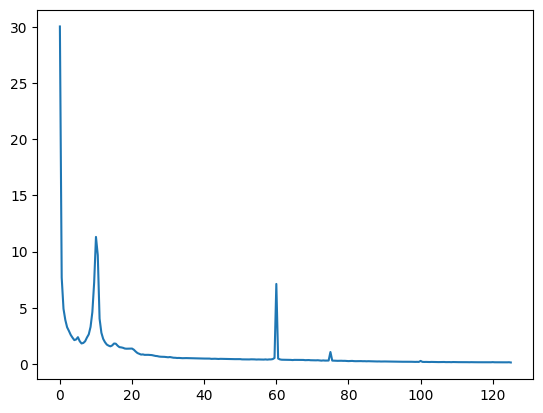

In [4]:
fft_data = np.fft.rfft(data, axis=1)
amps = 2*(np.abs(fft_data)/data.shape[1])
avg_amp = np.mean(amps, axis=0)
freqs = np.fft.rfftfreq(data.shape[1], 1/sr)

plt.plot(freqs, avg_amp)

## Notice that there are two prominent features in the freq domain representation. Make a lp filter that gets rid of power > 20Hz (you'll know if it worked if you get rid of the spike at 60Hz)
* Because our apply_filter function isn't optimized to work on matrices (we could do that, but haven't) you will need to loop and apply filter to each trial
* bonus: make the apply_filt function work on matrices! pay attention to the dimension of the data you are passing into the fft function - you want to fft across time!

In [5]:
filt_freq = 20
filt = mbf.define_filt(freqs, filt_freq, type_filt="lp")
filtered_data = mbf.apply_filt(data, filt)

## Then FFT it again to see if you got rid of the hf components of the signal

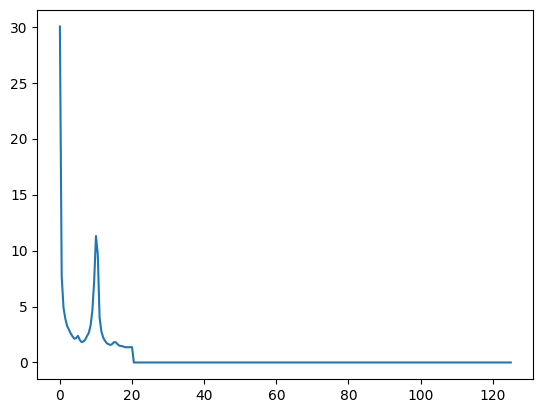

In [6]:
filtered_fft_data = np.fft.rfft(filtered_data, axis=1)
filtered_amps = 2*(np.abs(filtered_fft_data)/filtered_data.shape[1])
filtered_avg_amp = np.mean(filtered_amps, axis=0)
filtered_freqs = np.fft.rfftfreq(filtered_data.shape[1], 1/sr)

plt.plot(filtered_freqs, filtered_avg_amp)

## Now design a band pass filter that gets rid of everything outside of the 6-14Hz range (where that big bump is...)
* To design a band pass filter, make a lp filter, then make a hp filter
* Then combine the two filters (multiply them - element by element) 
* Then call the apply_filt function
* Then you should be left with only those frequencies that pass the lp and the hp filters (i.e. a band pass filter)!

In [7]:
filt_freq = [6, 14]
filt = mbf.define_filt(filtered_freqs, filt_freq, type_filt="band")
filtered_data = mbf.apply_filt(filtered_data, filt)

## Then FFT and look at filtered signal in the time and frequency domains (time domain on one plot, and freq on the other)

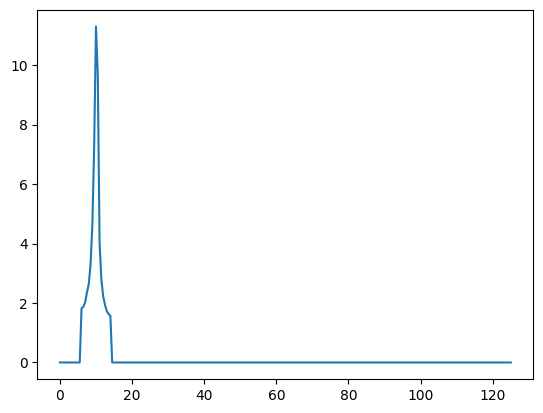

In [8]:
filtered_fft_data = np.fft.rfft(filtered_data, axis=1)
filtered_amps = 2*(np.abs(filtered_fft_data)/filtered_data.shape[1])
filtered_avg_amp = np.mean(filtered_amps, axis=0)
filtered_freqs = np.fft.rfftfreq(filtered_data.shape[1], 1/sr)

plt.plot(filtered_freqs, filtered_avg_amp)

## You can also make a band-stop filter using a similar logic
* Instead of multiplying the FFTed lp and the hp filters, you can add them together
* Use this to selectively get rid of the 60Hz line noise in the data by generated a band-stop filter over 50-70Hz

In [9]:
filt_freq = [50, 70]
filt = mbf.define_filt(freqs, filt_freq, type_filt="band-stop")
filtered_data = mbf.apply_filt(data, filt)

## Then FFT and look at filtered signal in the frequency domain

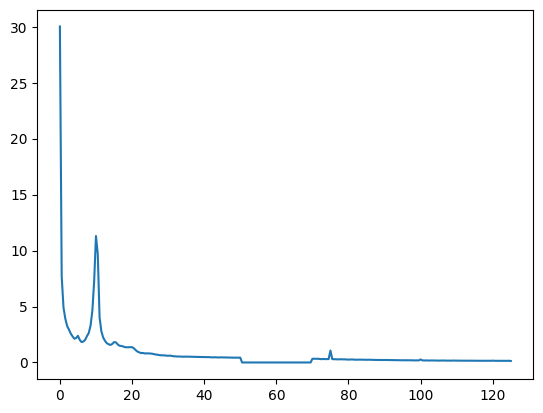

In [10]:
filtered_fft_data = np.fft.rfft(filtered_data, axis=1)
filtered_amps = 2*(np.abs(filtered_fft_data)/data.shape[1])
filtered_avg_amp = np.mean(filtered_amps, axis=0)
filtered_freqs = np.fft.rfftfreq(filtered_data.shape[1], 1/sr)

plt.plot(filtered_freqs, filtered_avg_amp)